In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_text
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
dataset = pd.read_csv('./diamonds.csv')
dataset.head()

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [4]:
dataset.describe()

,carat,depth,table,price,'x','y','z'
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
dataset.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
'x'        0
'y'        0
'z'        0
dtype: int64

In [6]:
# dataset = dataset[:10000]
# dataset.shape


In [7]:
dataset.cut.replace("b'Fair'",1,inplace=True)
dataset.cut.replace("b'Good'",2,inplace=True)
dataset.cut.replace("b'Very Good'",3,inplace=True)
dataset.cut.replace("b'Ideal'",4,inplace=True)
dataset.cut.replace("b'Premium'",5,inplace=True)
dataset.clarity.replace("b'I1'",1,inplace=True)
dataset.clarity.replace("b'IF'",2,inplace=True)
dataset.clarity.replace("b'SI1'",3,inplace=True)
dataset.clarity.replace("b'SI2'",4,inplace=True)
dataset.clarity.replace("b'VS1'",5,inplace=True)
dataset.clarity.replace("b'VS2'",6,inplace=True)
dataset.clarity.replace("b'VVS1'",7,inplace=True)
dataset.clarity.replace("b'VVS2'",8,inplace=True)
dataset.color.replace("b'J'",1,inplace=True)
dataset.color.replace("b'I'",2,inplace=True)
dataset.color.replace("b'H'",3,inplace=True)
dataset.color.replace("b'G'",4,inplace=True)
dataset.color.replace("b'F'",5,inplace=True)
dataset.color.replace("b'E'",6,inplace=True)
dataset.color.replace("b'D'",7,inplace=True)



<AxesSubplot: >

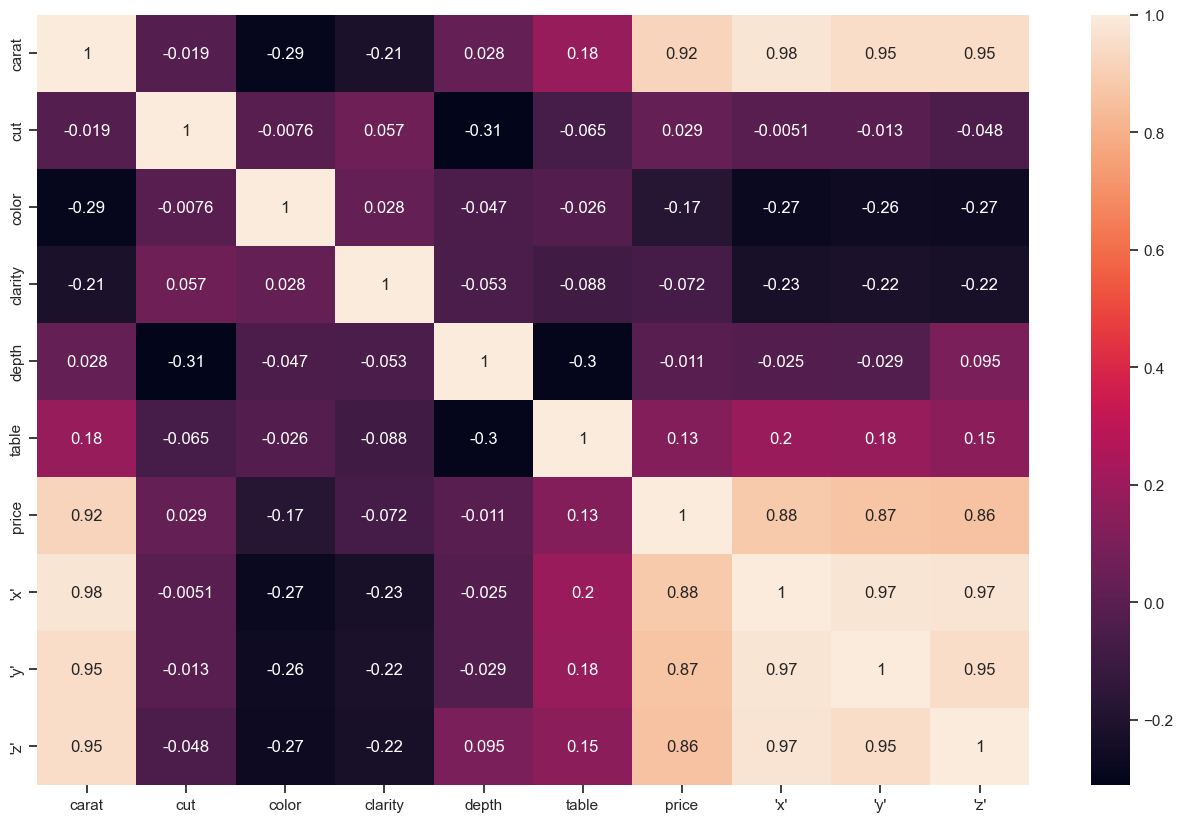

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(),annot=True)

In [9]:
shuffled = dataset.sample(frac=1)
x = shuffled.iloc[:, [0,1,2,3,4,5,7,8,9]].values
y = shuffled.iloc[:, 6].values
x

array([[1.01, 5.  , 4.  , ..., 6.41, 6.38, 3.94],
       [1.02, 3.  , 3.  , ..., 6.57, 6.66, 3.96],
       [0.72, 4.  , 7.  , ..., 5.71, 5.74, 3.58],
       ...,
       [0.7 , 5.  , 6.  , ..., 5.76, 5.73, 3.48],
       [1.52, 5.  , 7.  , ..., 7.51, 7.43, 4.59],
       [0.8 , 4.  , 4.  , ..., 6.02, 6.05, 3.67]])

In [10]:
y

array([ 7466.,  5131.,  3629., ...,  2307., 10308.,  2699.])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,shuffle=True)

In [12]:
KNeighborsRegressorObj = KNeighborsRegressor(n_neighbors=7)
KNeighborsRegressorObj

KNeighborsRegressor(n_neighbors=7)

In [37]:
KNeighborsRegressorObj.fit(X_train, y_train)
targer1_test = KNeighborsRegressorObj.predict(X_test)
target1_train = KNeighborsRegressorObj.predict(X_train) 

#print(regression_report(y_train,target1_train),classification_report(y_test,target1_test))

In [14]:
mean_squared_error(y_train, target1_train)

620338.4140489623

In [15]:
mean_absolute_error(y_train, target1_train)

414.10288879177926

In [45]:
r2_score(y_train, target1_train)

0.9609287272944043

In [39]:
mean_squared_error(y_test, targer1_test)

786682.2678051199

In [18]:
mean_absolute_error(y_test, targer1_test)

472.29777795434086

In [19]:
r2_score(y_test, targer1_test)

0.9510412457801598

In [20]:
scores = cross_val_score(KNeighborsRegressor(n_neighbors=7), x, y,cv = 50,scoring='neg_mean_absolute_error')
scores

array([-445.8078909 , -463.18575401, -455.48748842, -501.49556468,
       -485.05957898, -472.11094929, -445.58585992, -464.01999206,
       -417.63630346, -479.89845095, -464.430425  , -443.53965312,
       -441.79451873, -456.73308619, -454.35323712, -471.69985436,
       -464.28650867, -496.94373097, -452.91897259, -459.9826559 ,
       -458.93446313, -435.81782073, -455.83039852, -492.67668476,
       -427.88256322, -475.1335893 , -456.75069509, -461.88706474,
       -481.29352575, -462.616179  , -477.21196875, -453.17926652,
       -446.20534887, -485.0407785 , -423.35297233, -492.93843506,
       -502.39891434, -466.77174633, -465.66331259, -479.04448563,
       -473.53511794, -489.91200636, -485.41598198, -470.33686721,
       -500.91956003, -466.8619136 , -516.69785317, -466.23707925,
       -472.19374503, -446.88245428])

In [21]:
-np.mean(scores)

466.53186534635756

In [22]:
scores1 = cross_val_score(KNeighborsRegressor(n_neighbors=7), x, y,cv = 50,scoring='r2')
scores1

array([0.95939349, 0.94067761, 0.95538233, 0.95318674, 0.94132658,
       0.94452828, 0.95775803, 0.95130834, 0.95796644, 0.9438873 ,
       0.93648478, 0.95582788, 0.95704814, 0.94409181, 0.95486747,
       0.94278994, 0.94846118, 0.94252127, 0.95378784, 0.95161161,
       0.95662497, 0.96096425, 0.95749133, 0.94240375, 0.95631622,
       0.95166073, 0.95293519, 0.9521961 , 0.95039137, 0.9588826 ,
       0.94875929, 0.95563378, 0.95246823, 0.95228762, 0.95831844,
       0.9427377 , 0.94530578, 0.94431082, 0.94565823, 0.95143173,
       0.95791136, 0.94167704, 0.94239117, 0.95544051, 0.95028607,
       0.94881108, 0.93757259, 0.95828641, 0.95334129, 0.95616791])

In [23]:
np.mean(scores1)

0.9506314126232301

In [28]:
n_range = np.array(range(5,56,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])}]

In [29]:
%%time
clf_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=25, scoring='r2')
clf_gs.fit(x, y)
clf_gs.best_params_

CPU times: total: 1min 47s
Wall time: 1min 47s


{'n_neighbors': 5}

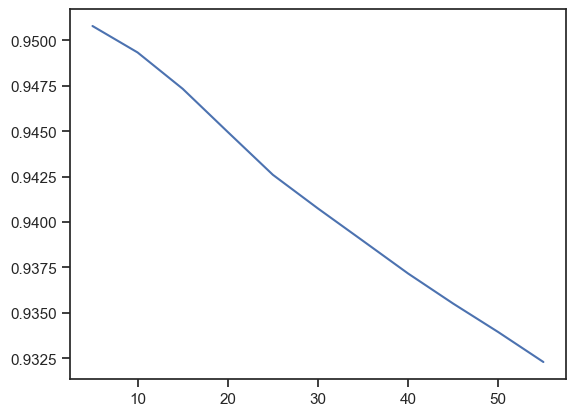

In [30]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [32]:
%%time
n_range = np.array(range(1,11,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

clf_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=25, scoring='r2')
clf_gs.fit(x, y)
clf_gs.best_params_

CPU times: total: 1min 11s
Wall time: 1min 12s


{'n_neighbors': 5}

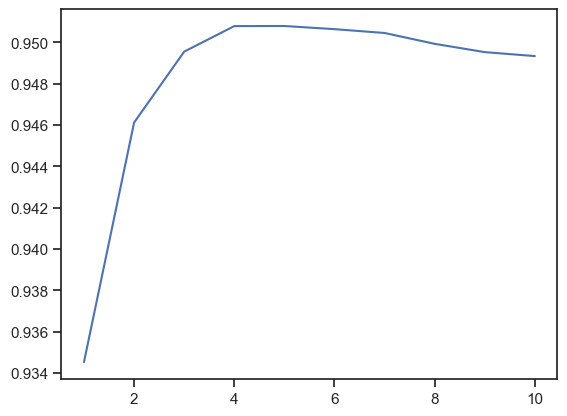

In [33]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [35]:
clf_gs.best_estimator_.fit(X_train, y_train)
target2_0 = clf_gs.best_estimator_.predict(X_train)
target2_1 = clf_gs.best_estimator_.predict(X_test)
r2_score(y_train, target2_0),r2_score(y_test, target2_1)

(0.9655762338071849, 0.9519485904468756)

In [40]:
r2_score(y_train, target1_train),r2_score(y_test, targer1_test)

(0.9609287272944043, 0.9510412457801598)

In [42]:
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='r2'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [43]:
def plot_validation_curve(estimator, title, x, y, 
                          param_name, param_range, cv, 
                          scoring='r2'):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, x, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

CPU times: total: 2min 52s
Wall time: 2min 52s


<module 'matplotlib.pyplot' from 'C:\\Users\\Notebook\\Desktop\\ml\\inetr\\mylabs\\lib\\site-packages\\matplotlib\\pyplot.py'>

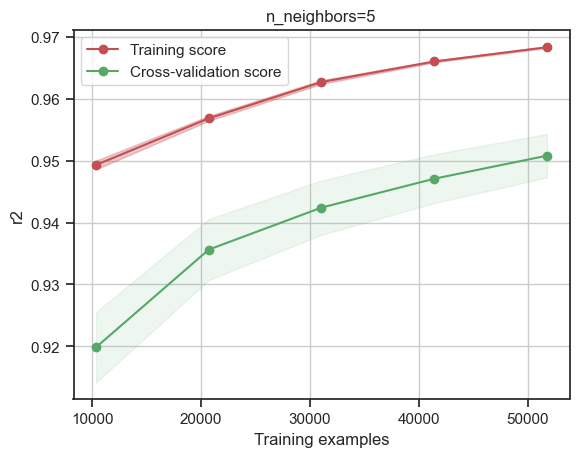

In [44]:
%%time
# 6.Построение кривых обучения и валидации
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=5', x, y, cv=25, train_sizes=np.linspace(.2, 1.0, 5))